In [47]:
# importing 
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv(r'F:\codes\dsbda\project\diabetes.csv')
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [71]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

Data Cleaning

In [49]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
print("before dropna is used", data.shape)
data.dropna()

print("after dropna is used", data.shape)


before dropna is used (1690, 9)
after dropna is used (1690, 9)


In [51]:

print("before duplicate is used", data.shape)

data.drop_duplicates()
print("after duplicate is used ", data.shape)

before duplicate is used (1690, 9)
after duplicate is used  (1690, 9)


Visualization

<Axes: xlabel='Outcome', ylabel='count'>

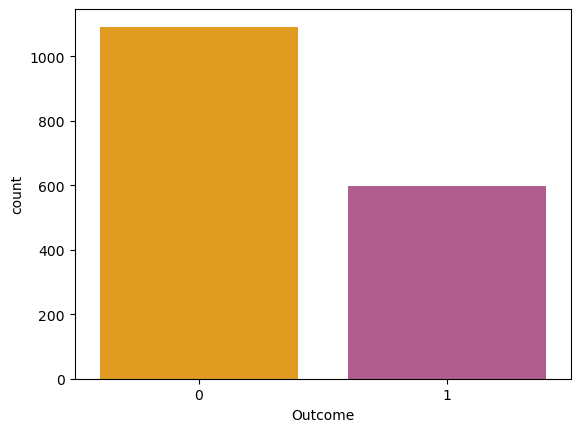

In [52]:
cols=["#ffa600","#bc5090"]
sns.countplot(x=data["Outcome"],palette= cols)

<Axes: xlabel='Pregnancies', ylabel='count'>

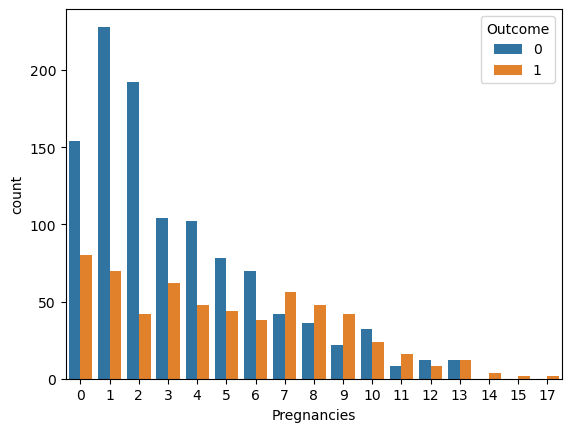

In [53]:
sns.countplot(data= data , x='Pregnancies' , hue="Outcome")

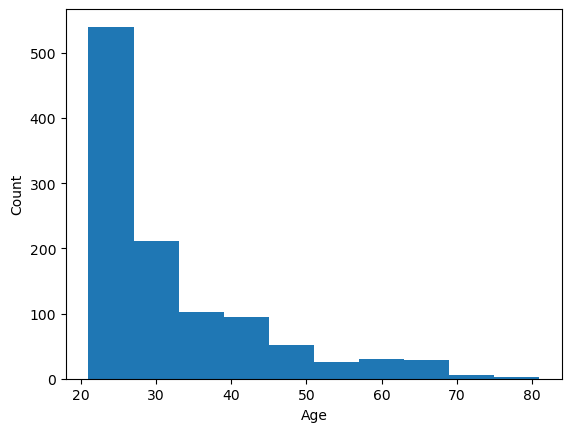

In [54]:
# create datarame in Outcome =0 and Outcome=1
diabetes_0=data[data['Outcome']==0]
diabetes_1=data[data['Outcome']==1]

# histogram of the "Age" variable in the "Outcome=0" dataset 
plt.hist(diabetes_0["Age"] )
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

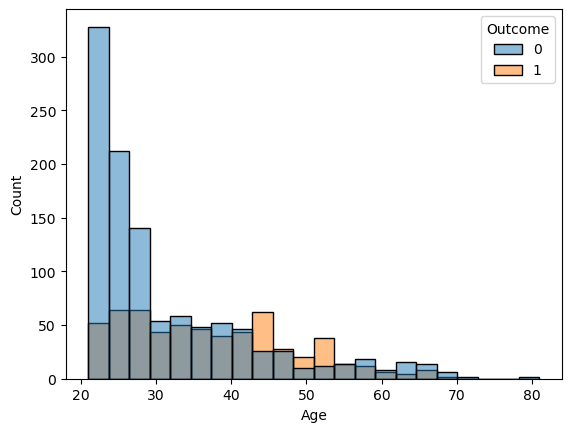

In [55]:
# histogram of the "Age"  
sns.histplot(data=data, x='Age'  , hue='Outcome')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

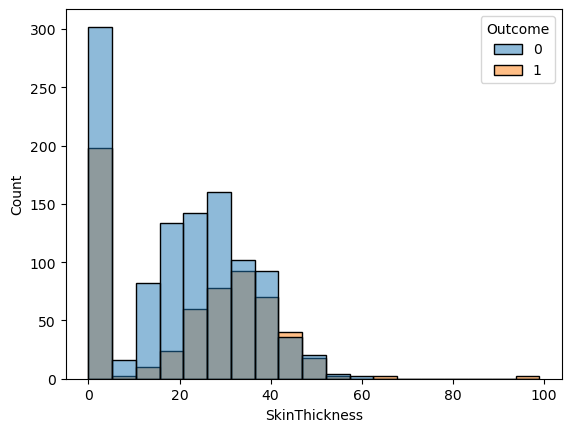

In [56]:
# histogram of the "SkinThickness"  

sns.histplot(data=data, x='SkinThickness'  , hue='Outcome')
plt.xlabel("SkinThickness")
plt.ylabel("Count")
plt.show()

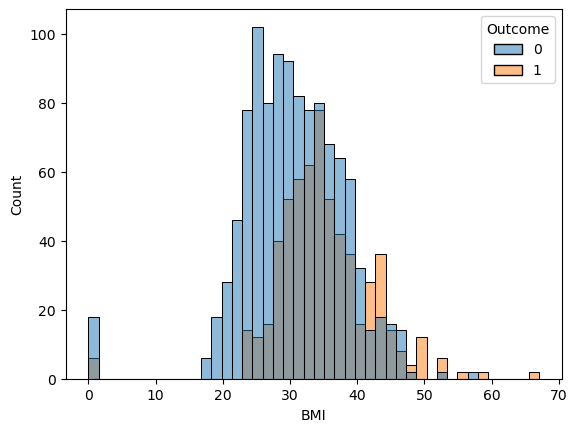

In [57]:
## histogram of the "BMi"  

sns.histplot(data=data, x='BMI'  , hue='Outcome')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

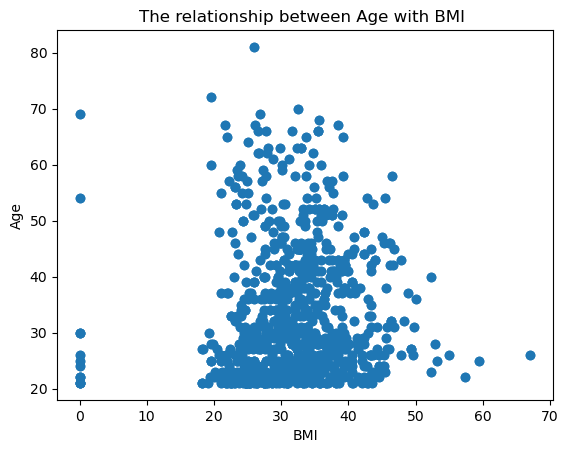

In [58]:
#scateer plot relationship between Age with BMI
plt.scatter (data["BMI"] , data["Age"] )
plt.title ("The relationship between Age with BMI ")
plt.xlabel ('BMI' )
plt.ylabel ('Age')
plt.show ()

Data Spliting

In [59]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building

In [60]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
k1=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
k1.fit(X_train,y_train)
y_pred2=k1.predict(X_test)
y_pred2
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred2)*100
print(ac)


81.36094674556213


In [61]:
#decision tree¶
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred5=dt.predict(X_test)
y_pred5
accuracy_score(y_test,y_pred5)*100

94.67455621301775

In [62]:
#random forest¶
from sklearn.ensemble import RandomForestClassifier
r1=RandomForestClassifier()
r1.fit(X_train,y_train)
y_pred4=r1.predict(X_test)
y_pred4
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred4)*100
print(ac)

98.22485207100591


In [63]:
# decision tree¶
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred5=dt.predict(X_test)
y_pred5
accuracy_score(y_test,y_pred5)*100

94.0828402366864

In [64]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)
y_pred5=lr.predict(X_test)
y_pred5
accuracy_score(y_test,y_pred5)*100

78.10650887573965

In [65]:

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred5))


Confusion matrix:
 [[209  30]
 [ 44  55]]


In [68]:
import pickle
from sklearn.svm import SVC
pickle.dump(r1, open('abc.pkl', 'wb'))

In [67]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a new example dataset
example_data = np.array([[1, 185, 66, 29, 0, 26.6, 0.351, 31]])

# Preprocess the example data
example_data_processed = scaler.transform(example_data)

# Make a prediction on the example data
prediction = lr.predict(example_data_processed)

# Print the prediction
print(prediction)


[0]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
